Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
sns.set_style('darkgrid')

Importing our dataset

In [4]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


Performing a small EDA

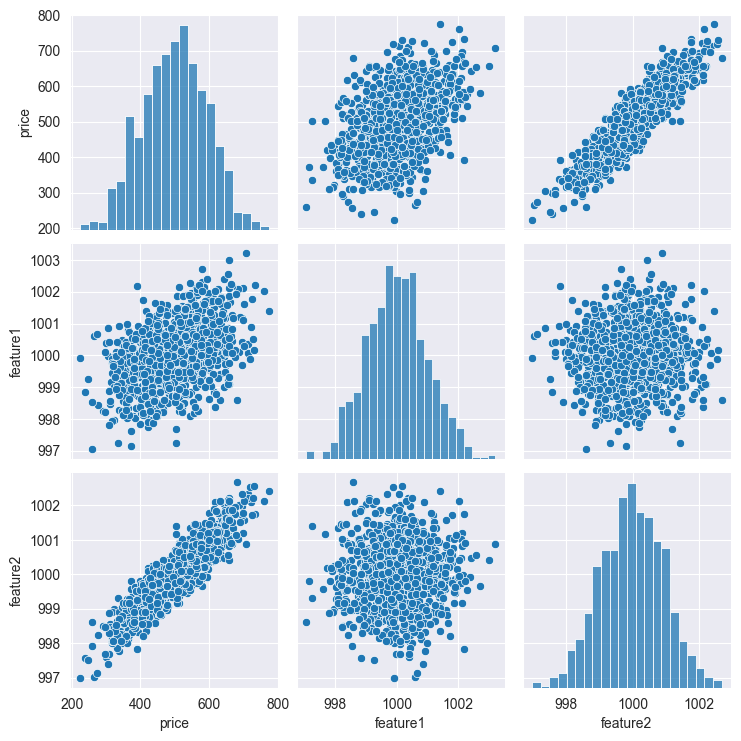

In [5]:
sns.pairplot(df)

Splitting our data into training and testing subsets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('price', axis=1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling our data so as to get optimum results

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building our model!

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### **Choosing an optimizer and loss**
Keep in mind what kind of problem you are trying to solve:
```python
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_classification',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')
```

In [11]:
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=1))
model.compile(optimizer='rmsprop', loss='mse')

In [12]:
model.fit(X_train, y_train, epochs=250, verbose=1)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 261258.8438
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256434.1719 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259375.4375
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256579.9219 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258617.7031 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 261319.4688 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255610.8750 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252582.2188 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259252.6719 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253649.8438 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256490.4062  
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252463.0000
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 249523.4219
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252

<Axes: >

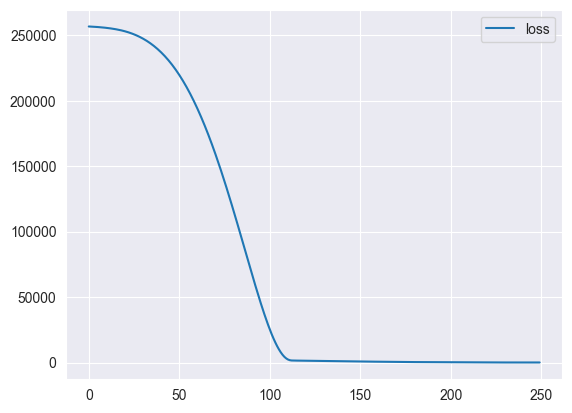

In [13]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Evaluating our model based on training and testing sets

In [14]:
model.evaluate(X_test, y_test, verbose=0)

26.714784622192383

In [15]:
model.evaluate(X_train, y_train, verbose=0)

24.654325485229492

In [16]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Creating a dataframe containing true and predicted values

In [17]:
test_predictions = pd.Series(data=test_predictions.ravel())
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [18]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [19]:
pred_df.columns = ['Test True Y', 'Model Predictions']
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,406.742737
1,624.156198,624.153992
2,582.455066,592.707764
3,578.588606,573.401062
4,371.224104,368.913239


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

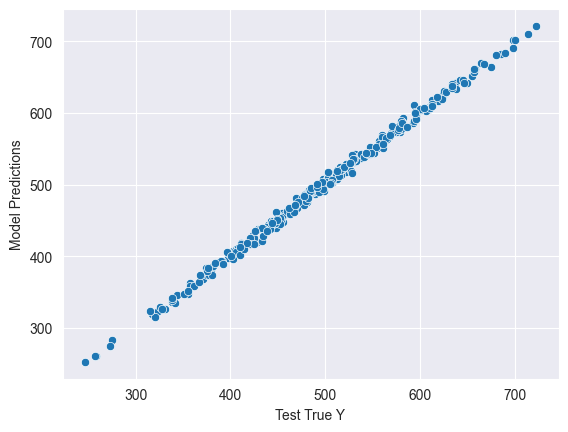

In [20]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

Evaluating our model based on `sklean`'s metric methods

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.195255445188317

In [23]:
mse = mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])
rmse = np.sqrt(mse)
print(mse)

26.714790341334588


Predicting unkown _(new)_ data!

In [24]:
new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)

In [25]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[421.73032]], dtype=float32)

Saving our model

In [26]:
from tensorflow.keras.models import load_model

In [27]:
model.save('my_gem_model.keras')   # .h5 is the extension you should use while saving models!

Importing our saved model!

In [28]:
later_model = load_model('my_gem_model.keras')

In [29]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[421.73032]], dtype=float32)